<a href="https://colab.research.google.com/github/iashyam/Mp3/blob/main/FiniteDiffrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Shyam Sunder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.sparse import diags

Let $y = y(x)$ be a function of x. 
<br>
Then we know from taylor's series: 
<br>
<br>
\begin{equation}
y(x+h) = y(x) + hy'(x) + h^2y''(x) + \cdots \\
y(x-h) = y(x) - hy'(x) + h^2y''(x) - \cdots
\end{equation}

Substracting these two we get:
$$y(x+h)-y(x-h)=2hy'(x) + \mathcal{O}(h^3)$$
$$y'(x) = \frac{y(x+h)-y(x-h)}{2h} + \mathcal{O}(h^3)$$

>This is called **Central Difference Formula for diffrentiation.**

By adding these two, we get
$$y"(x) = \frac{y(x+h)+y(x-h)-2y(x)}{h^2} + \mathcal{O}(h^4)$$
<br>
In context of any diffrential equation, We are given boundries $x_0$ to $X_n$. <br> So we can simply devide it into N equal parts deffering by h. Let $x_i = x_0 + ih$ represent a point in this intevel. So $y_i = y(x_i)$. We can write the equation <br> <br>
$$y"(x) = \frac{y_{i+1} + y_{i-1} - 2y_{i}}{h^2}$$\
and also 
$$y'(x) = \frac{y_{i+1}-y_i}{h}$$

We want to solve the boundry value problem

$$\frac{d^2 y}{dx^2} -\frac{dy}{dx} - 2y = cos(x)$$


$$y(0) = -0.3 \quad y(\pi/2)= -0.1$$


$$0 \leq x \leq \frac{\pi}{2} $$
We can break the interval $[0, \frac{\pi}{2}]$ into $n$ parts and label them with is where
$x_i = 0 + ih$ and $h$ is the diffrence bewteen two terms.

We can write the \autoref{pro} as
$$y" - y' - 2y = \cos(x)$$
When we apply the finite diffrence method we get
\begin{equation*}
    \frac{y_{i+1} + y_{i-1} - 2y_{i}}{h^2} -  \frac{y_{i+1}-y_i}{h} - 2y_i = \cos(x_i)
\end{equation*}

Now we will put some values of i
$$y_0 = -0.3 \quad \quad i =0 $$
$$ \frac{1}{h^2}\left( 1.y_{0} + (-2h^2+h-2)y_1 + (1-h)y_{2}\right)  = \cos(x_1) \quad i = 1$$
$$ \frac{1}{h^2}\left( 1.y_{1} + (-2h^2+h-2)y_2 + (1-h)y_{3}\right)  = \cos(x_2) \quad i = 2$$
    \vdots 
$$ \frac{1}{h^2}\left( 1.y_{i-1} + (-2h^2+h-2)y_{i} + (1-h)y_{i+1}\right)  = \cos(x_i) \quad i = i$$
    \vdots
$$ \frac{1}{h^2}\left( 1.y_{n-2} + (-2h^2+h-2)y_{n-1} + (1-h)y_{n}\right)  = \cos(x_{n-1}) \quad i = n-1$$
$$y_n = -0.1$$

We can Represent this in the Matrix forms as

\begin{equation}
    \frac{1}{h^2}
    \begin{bmatrix}
        h^2 & 0 & 0 & \cdots & 0 & 0 \\
        1 & -2+h-2h^2 & 1-h  &\cdots & 0 & 0 \\
        0 & 1 &  -2+h-2h^2   &\cdots & 0 & 0 \\
        \vdots & \vdots & & & & \vdots \\
        0 & 0 & 0 & \cdots & -2+h-2h^2 & 1-h \\
        0 & 0 & 0 & \cdots & 0 & h^2 
    \end{bmatrix}
    \begin{bmatrix}
        y_0 \\
        y_1 \\
        y_2 \\ 
        \vdots \\
        y_{n-1} \\
        y_n
    \end{bmatrix} =
    \begin{bmatrix}
        -0.3 \\
        cos(x_1) \\
        cos(x_2) \\
        \vdots \\
        cos(x_{n-1}) \\
        -0.1
    \end{bmatrix}
\end{equation}

\begin{equation}
    MY = b
\end{equation}

In [ ]:
pi = math.pi
xs = np.linspace(0, math.pi/2,100)
h = np.diff(xs)[0] #size of each step
N = xs.size #number of steps

To desging the M matrix we would take a different approach. I will design the diagoals of the matrix sperately and then I will put them into a empty matrix using diag. 

In [ ]:
#desging the diagonals of the matrix
d1 = np.ones(N-1)
d0 = (-2+h-2*h**2)*np.ones(N)
d3 = (1-h)*np.ones(N-1)

# d1 = np.ones(N-1)
# d0 = -2*np.ones(N)
# d3 = d1

#Putting the dignoals into a empty matrix
M = diags([d1,d0,d3],[-1,0,1]).toarray()

#multiplying by 1/h^2 fector
M = (1/h**2)*M

#putting in the boundry Coditions
M[0][0]=1
M[0][1]=0
M[-1][-1]=1
M[-1][-2] = 0

In [ ]:
#desing the left matrix
b = np.zeros(N)
for i in range(len(b)):
    b[i] = math.cos(xs[i])
b[0]=-0.3
b[-1]=-0.1

We will use the gaussian elimination method to solve the equation

In [ ]:
def gaussianElimination(A, B):
    n = len(A)
    A = np.c_[A, B]
    
    #getting echilion matrix:
    for i in range(n):
        for j in range(i+1,n):
            fector = A[j][i]/A[i][i]
            for k in range(i, n+1):
                A[j][k] -= A[i][k]*fector

    c = [0 for _ in B]        
    #backSubstitution
    string = ''
    for i in range(n-1,-1,-1):
        sum = 0
        for j in range(i,n):
            sum += A[i][j]*c[j]
        c[i] = (A[i][-1] -sum)/A[i][i]
        
    return c

In [ ]:
ys = gaussianElimination(M,b)

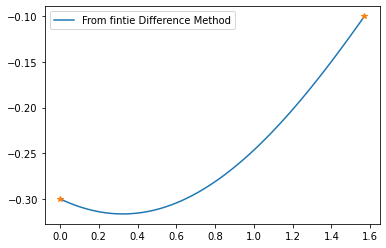

In [ ]:
plt.plot(xs, ys, label='From fintie Difference Method')
plt.plot((0,pi/2),(-.3,-.1), '*')
plt.legend()
plt.show()

The Theoritical solution for this problem is:
$$y(x) = \frac{1}{10}(-sin(x)-3(cos(x))$$

In [ ]:
def theory(x):
    return (1/10)*(-math.sin(x)-3*math.cos(x))

In [ ]:
y_th = [theory(x) for x in xs]

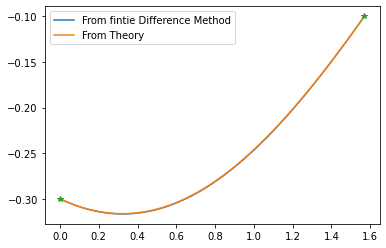

In [ ]:
plt.plot(xs, ys, label='From fintie Difference Method')
plt.plot(xs, y_th, label='From Theory')
plt.plot((0,pi/2),(-.3,-.1), '*')
plt.legend()
plt.show()

## So as we can see that our solution exactly matches with the theorictical value